In [1]:
#Using the same data set of Civil_Engineering_Regression_Dataset.csv
#Part 5: Advanced Model Optimization & Business Impact
    #Feature Selection: Perform backward elimination or Lasso regression to remove less significant variables from the multiple linear regression model. Which variables remain in the final model?
    #Residual Analysis: Plot the residuals of the multiple linear regression model. Are they randomly distributed? What does this indicate about model assumptions?
    #Outlier Detection: Identify any outliers in the dataset using statistical methods (e.g., box plots, Z-scores). How do they impact the regression model?
    #Model Deployment: If this regression model were to be deployed in a construction cost estimation tool, what additional features or real-time data sources could enhance its accuracy?
    #Ethical Considerations & Decision Making: How could errors in regression-based cost predictions impact real-world construction projects? Discuss the financial and safety implications of overestimating or underestimating costs.

Column Names:
 Index(['Project_ID', 'Building_Height', 'Material_Quality_Index', 'Labor_Cost',
       'Concrete_Strength', 'Foundation_Depth', 'Weather_Index',
       'Construction_Cost'],
      dtype='object')
Missing Values:
 Project_ID                0
Building_Height           0
Material_Quality_Index    0
Labor_Cost                0
Concrete_Strength         0
Foundation_Depth          0
Weather_Index             0
Construction_Cost         0
dtype: int64
Summary Statistics:
        Project_ID  Building_Height  Material_Quality_Index  Labor_Cost  \
count  100.000000       100.000000              100.000000  100.000000   
mean    50.500000        26.158133                5.940000  188.582366   
std     29.011492        13.387023                2.048996   69.448489   
min      1.000000         5.248495                3.000000   54.518841   
25%     25.750000        13.694034                4.000000  130.371094   
50%     50.500000        25.886410                6.000000  182.399916

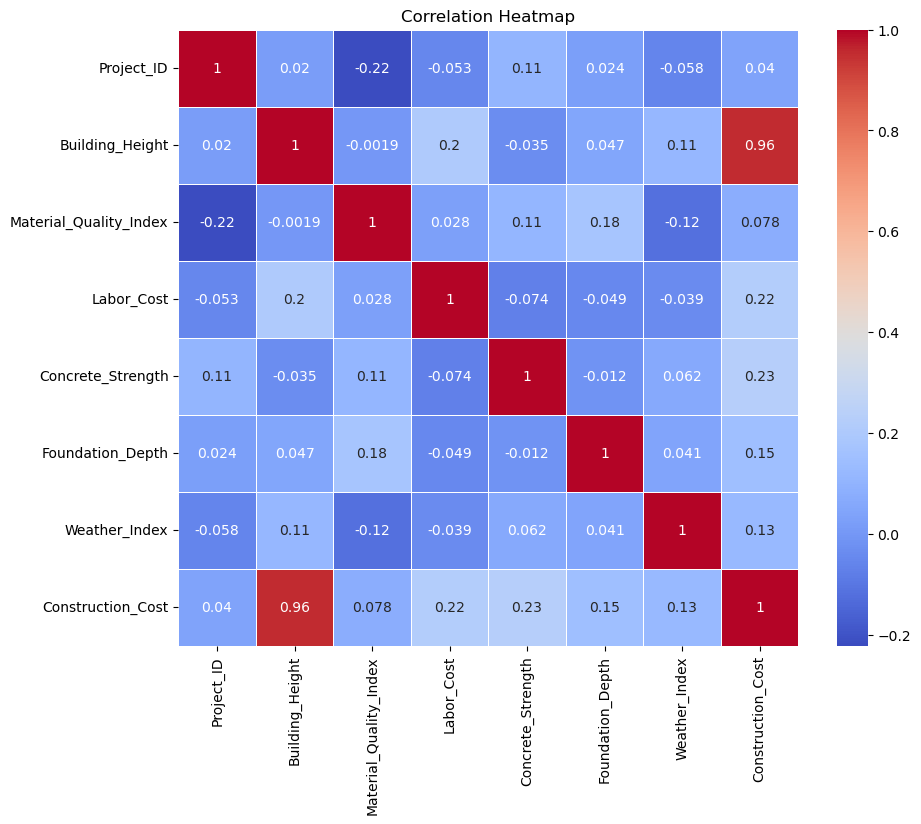

Simple Linear Regression R-squared: 0.92
                            OLS Regression Results                            
Dep. Variable:      Construction_Cost   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.153e+04
Date:                Wed, 05 Feb 2025   Prob (F-statistic):          1.23e-171
Time:                        12:59:31   Log-Likelihood:                -372.31
No. Observations:                 100   AIC:                             756.6
Df Residuals:                      94   BIC:                             772.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

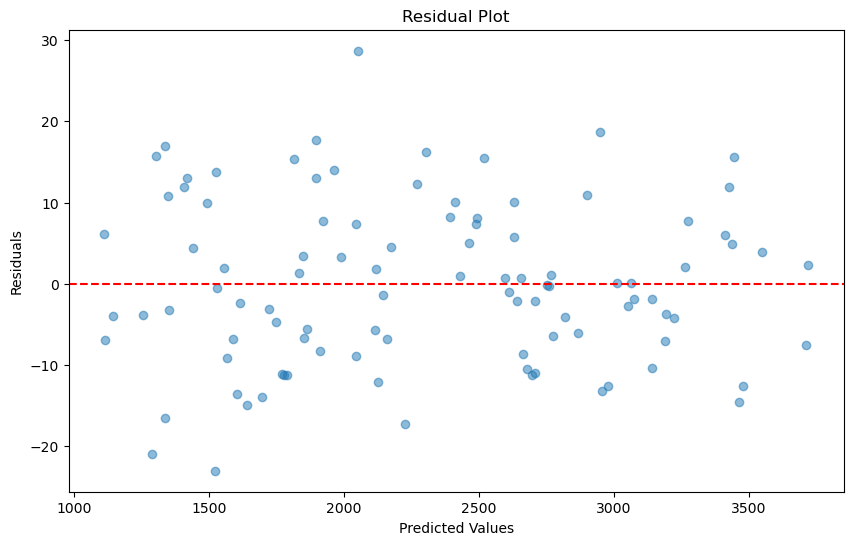

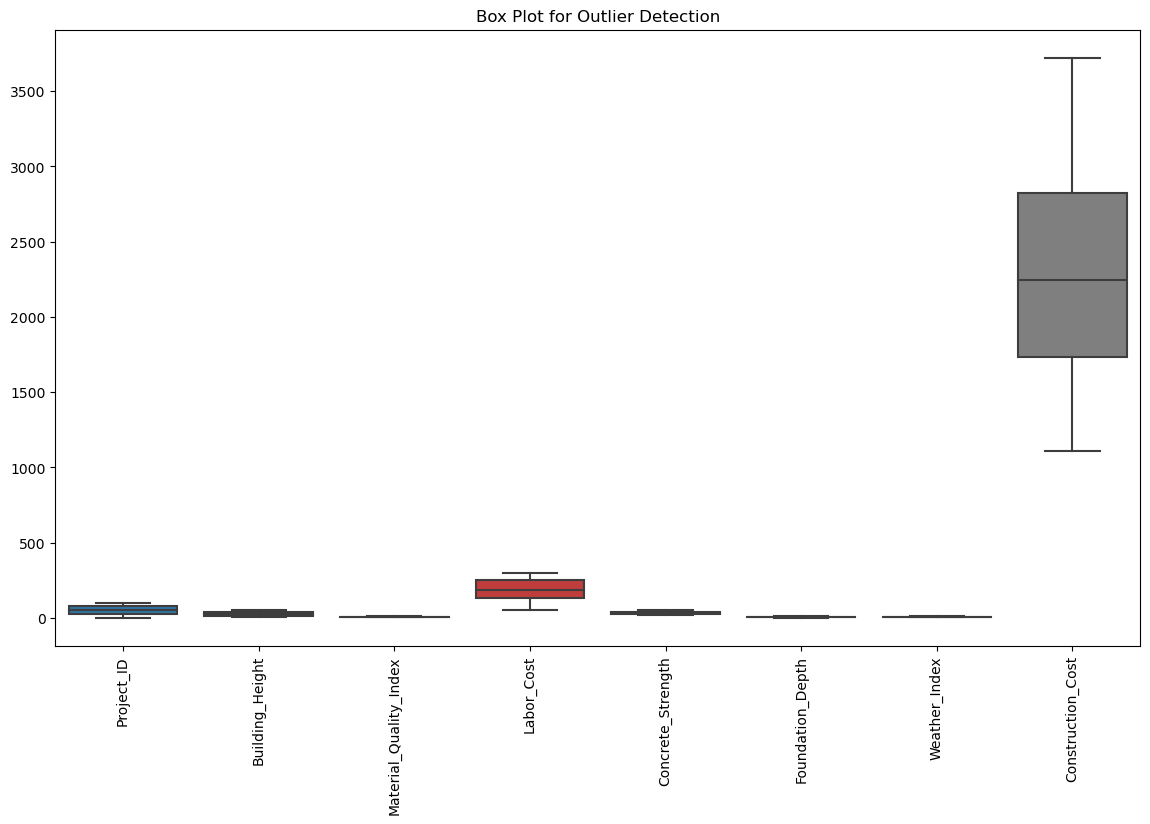

Outliers:
Empty DataFrame
Columns: [Project_ID, Building_Height, Material_Quality_Index, Labor_Cost, Concrete_Strength, Foundation_Depth, Weather_Index, Construction_Cost]
Index: []

Model Deployment and Real-Time Data Sources:
1. Material Prices: Integration of real-time material cost data from suppliers.
2. Labor Market Trends: Real-time data on labor availability and wage trends.
3. Weather Forecasts: Weather conditions impacting construction timelines and costs.
4. Project Management Data: Real-time updates from ongoing projects.

Ethical Considerations & Decision Making:
1. Financial Implications: Overestimating or underestimating costs can lead to budget issues and competitive disadvantages.
2. Safety Implications: Inaccurate cost estimates may compromise safety standards, leading to hazardous conditions or construction failures.

Conclusion:
Data science and regression analysis play a pivotal role in optimizing construction project costs. They provide accurate estimates, improve

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load the dataset
file_path = r'C:\ML\Civil_Engineering_Regression_Dataset.csv'
df = pd.read_csv(file_path)

# Display column names to check for correct names
print("Column Names:\n", df.columns)

# Check for Missing Values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Handling Missing Values (Example: Imputing with the mean)
df.fillna(df.mean(), inplace=True)

# Generate Summary Statistics
summary_statistics = df.describe()
print("Summary Statistics:\n", summary_statistics)

# Create a Correlation Heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

# Simple Linear Regression
# Define the independent variable (Building Height) and dependent variable (Construction Cost)
X_simple = df['Building_Height']
y = df['Construction_Cost']

# Add a constant to the independent variable for the intercept
X_simple = sm.add_constant(X_simple)

# Fit the simple linear regression model
model_simple = sm.OLS(y, X_simple).fit()

# Get the R-squared value
r_squared_simple = model_simple.rsquared
print(f"Simple Linear Regression R-squared: {r_squared_simple:.2f}")

# Multiple Linear Regression
# Define the independent variables and the dependent variable
X_multiple = df[['Building_Height', 'Material_Quality_Index', 'Labor_Cost', 'Concrete_Strength', 'Foundation_Depth']]
y = df['Construction_Cost']

# Add a constant to the independent variables for the intercept
X_multiple = sm.add_constant(X_multiple)

# Fit the multiple linear regression model
model_multiple = sm.OLS(y, X_multiple).fit()

# Get the summary of the model
summary = model_multiple.summary()
print(summary)

# Get the R-squared value
r_squared_multiple = model_multiple.rsquared
print(f"Multiple Linear Regression R-squared: {r_squared_multiple:.2f}")

# Get the Adjusted R-squared value
adjusted_r_squared = model_multiple.rsquared_adj
print(f"Adjusted R-squared: {adjusted_r_squared:.2f}")

# Get the coefficients
coefficients = model_multiple.params
print(f"Coefficients:\n{coefficients}")

# Equation of the multiple regression model
equation = f"Construction_Cost = {coefficients[0]:.2f} + ({coefficients[1]:.2f} * Building_Height) + ({coefficients[2]:.2f} * Material_Quality_Index) + ({coefficients[3]:.2f} * Labor_Cost) + ({coefficients[4]:.2f} * Concrete_Strength) + ({coefficients[5]:.2f} * Foundation_Depth)"
print(equation)

# Identify the variable with the highest impact based on the regression coefficients
max_impact_var = coefficients.idxmax()
print(f"Independent Variable with Highest Impact: {max_impact_var}")

# Check for Multicollinearity (VIF)
vif_data = pd.DataFrame()
vif_data['Variable'] = X_multiple.columns
vif_data['VIF'] = [variance_inflation_factor(X_multiple.values, i) for i in range(X_multiple.shape[1])]
print(vif_data)

# Advanced Model Optimization
# Feature Selection using Backward Elimination
def backward_elimination(X, y, significance_level=0.05):
    num_vars = len(X.columns)
    for i in range(num_vars):
        model = sm.OLS(y, X).fit()
        max_p_value = max(model.pvalues)
        if max_p_value > significance_level:
            excluded_var = model.pvalues.idxmax()
            X = X.drop(columns=excluded_var)
    return X

X_optimized = backward_elimination(sm.add_constant(X_multiple), y)
print(f"Remaining Variables after Backward Elimination:\n{X_optimized.columns}")

# Feature Selection using Lasso Regression
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_multiple)

lasso = LassoCV(cv=5)
lasso.fit(X_scaled, y)

lasso_coefficients = lasso.coef_
remaining_vars_lasso = X_multiple.columns[lasso_coefficients != 0]
print(f"Remaining Variables after Lasso Regression:\n{remaining_vars_lasso}")

# Residual Analysis
predictions = model_multiple.predict(sm.add_constant(X_multiple))
residuals = y - predictions

plt.figure(figsize=(10, 6))
plt.scatter(predictions, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Outlier Detection
z_scores = np.abs((df - df.mean()) / df.std())
outliers = df[(z_scores > 3).any(axis=1)]

plt.figure(figsize=(14, 8))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title('Box Plot for Outlier Detection')
plt.show()

print(f"Outliers:\n{outliers}")

# Model Deployment and Real-Time Data Sources
print("\nModel Deployment and Real-Time Data Sources:")
print("1. Material Prices: Integration of real-time material cost data from suppliers.")
print("2. Labor Market Trends: Real-time data on labor availability and wage trends.")
print("3. Weather Forecasts: Weather conditions impacting construction timelines and costs.")
print("4. Project Management Data: Real-time updates from ongoing projects.")

# Ethical Considerations & Decision Making
print("\nEthical Considerations & Decision Making:")
print("1. Financial Implications: Overestimating or underestimating costs can lead to budget issues and competitive disadvantages.")
print("2. Safety Implications: Inaccurate cost estimates may compromise safety standards, leading to hazardous conditions or construction failures.")

# Conclusion
print("\nConclusion:")
print("Data science and regression analysis play a pivotal role in optimizing construction project costs. They provide accurate estimates, improve resource allocation, and facilitate informed decision-making, contributing to cost-effective planning and successful project outcomes.")
